# Week 7 - Milestone One week

# 1. Lesson: no lesson this week.  Milestone One is due!

# 2. Weekly graph question

Below are the graphs from last week's weekly graph question.  Suppose you wanted to cause the viewer to examine the last three months of data first.  

How could you use **preattentive attributes** to do that?  Suggest several possibilities.

In [23]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # Import the dates module



# plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['axes.titlesize']  = 10
plt.rcParams['axes.labelsize']  = 8
plt.rcParams['lines.linewidth'] = 0.5
# plt.rcParams['lines.markersize'] = 3
plt.rcParams['axes.edgecolor']  = 'gray'
plt.rcParams['xtick.color']     = 'gray'
plt.rcParams['ytick.color'] = 'gray'
plt.rcParams['xtick.color'] = 'gray'
plt.rcParams['ytick.color'] = 'gray'
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['xtick.labelsize'] = 8

Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

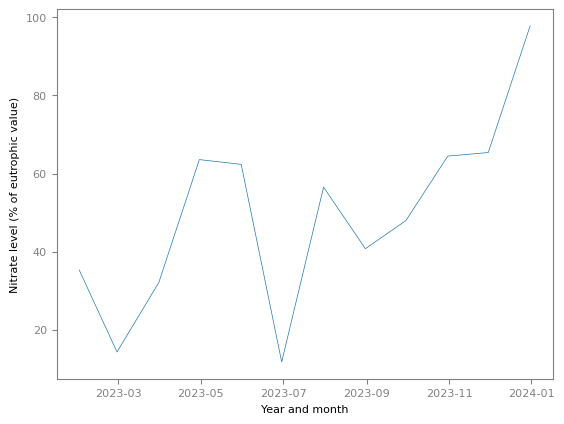

In [6]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='ME')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

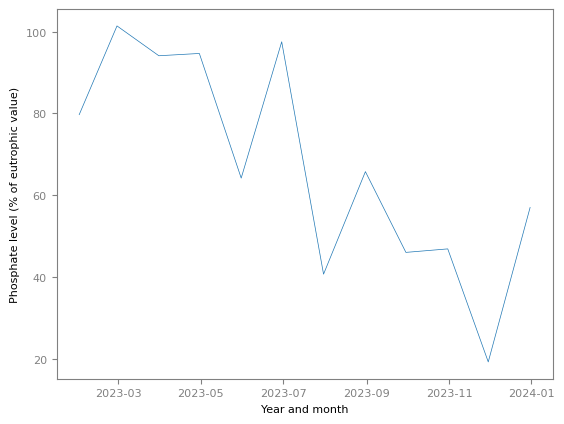

In [7]:
np.random.seed(1)
time_series = 100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='ME')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

## <font color='plum'> ANSWER

<font color = 'plum'> Options:
* Plot last three months in a different, bright color.
* Increase linewidth and/or add larger markers for the last three months.
* Overlay distinct markers (e.g., circles, squares) on the last three data points.
* Plot the first nine months in a light shade and the last three in a darker shade of the same color.
* consolidate axes b/c plots share the same time scale and units

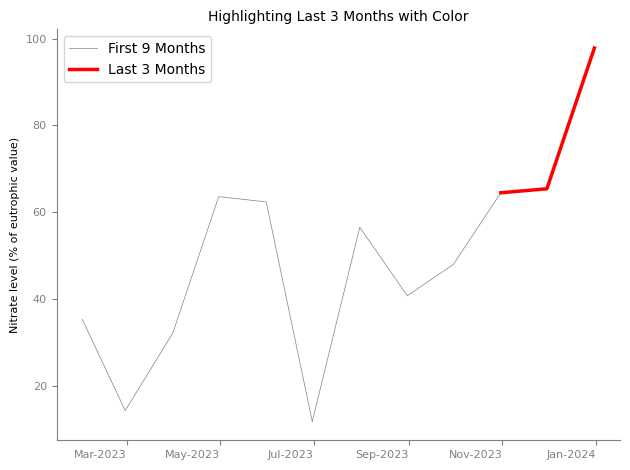

In [31]:

numdates = 12
np.random.seed(0)
time_series_nitrate = 100 * (np.random.normal(size=numdates) / 5 + np.arange(numdates) / 16)
datearray           = pd.date_range(start='2023/01/01', end='2024/01/01', freq='ME')

# Plotting
fig, ax = plt.subplots() # Use subplots to easily access the axes object 'ax'

# Plot the entire series in a neutral color
ax.plot(datearray, time_series_nitrate, color='grey', label='First 9 Months')

# Highlight the last three months with a distinct color
ax.plot(datearray[-3:], time_series_nitrate[-3:], color='red', linewidth=2.5, label='Last 3 Months')
# ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")
ax.set_title("Highlighting Last 3 Months with Color")
ax.legend()


date_format = mdates.DateFormatter('%b-%Y') # %b for abbreviated month, %Y for 4-digit year

# Apply the formatter to the x-axis
ax.xaxis.set_major_formatter(date_format)

# Optional: Rotate the labels to prevent them from overlapping
plt.setp(ax.get_xticklabels(), rotation=0, ha="right")
# --- END: Date Formatting ---

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout() # Adjust layout to make room for rotated labels
plt.show()

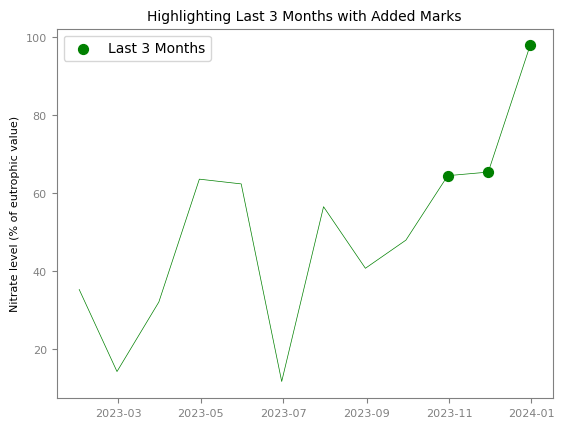

In [32]:
plt.figure()
# Plot the full line
plt.plot(datearray, time_series_nitrate, color='green', label='_nolegend_')

# Add distinct markers for the last three months
plt.scatter(datearray[-3:], time_series_nitrate[-3:], color='green', s=50, zorder=5, label='Last 3 Months')
# plt.xlabel("Year and month")
plt.ylabel("Nitrate level (% of eutrophic value)")
plt.title("Highlighting Last 3 Months with Added Marks")
plt.legend()
plt.show()

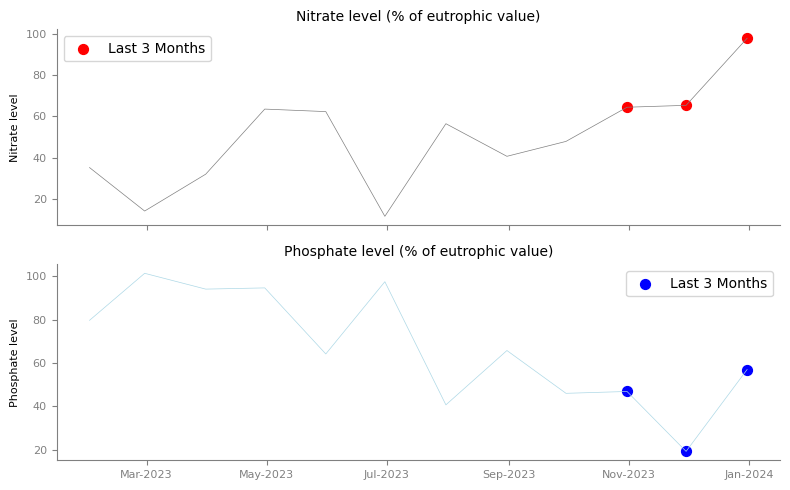

In [19]:

# Generate data
numdates    = 12
datearray   = pd.date_range(start='2023/01/01', periods=numdates, freq='ME')

np.random.seed(0)
nitrate_series      = 100 * (np.random.normal(size=numdates) / 5 + np.arange(numdates) / 16)

np.random.seed(1)
phosphate_series    = 100 * (1 - (np.random.normal(size=numdates) / 8 + np.arange(numdates) / 16))

nitrate_df      = pd.DataFrame({'Date': datearray, 'Value': nitrate_series})
phosphate_df    = pd.DataFrame({'Date': datearray, 'Value': phosphate_series})

# Identify last 3 months
nitrate_df['Highlight']     = ['Last 3 Months' if i >= numdates - 3 else 'Earlier' for i in range(numdates)]
phosphate_df['Highlight']   = ['Last 3 Months' if i >= numdates - 3 else 'Earlier' for i in range(numdates)]


fig, axes = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

# Nitrate plot
axes[0].plot(nitrate_df['Date'], nitrate_df['Value'], color='gray')
axes[0].scatter(nitrate_df[nitrate_df['Highlight'] == 'Last 3 Months']['Date'],
                nitrate_df[nitrate_df['Highlight'] == 'Last 3 Months']['Value'],
                color='red', s=50, label='Last 3 Months')
axes[0].set_title("Nitrate level (% of eutrophic value)")
axes[0].set_ylabel("Nitrate level")
axes[0].legend()

# Phosphate plot
axes[1].plot(phosphate_df['Date'], phosphate_df['Value'], color='lightblue')
axes[1].scatter(phosphate_df[phosphate_df['Highlight'] == 'Last 3 Months']['Date'],
                phosphate_df[phosphate_df['Highlight'] == 'Last 3 Months']['Value'],
                color='blue', s=50, label='Last 3 Months')
axes[1].set_title("Phosphate level (% of eutrophic value)")
axes[1].set_ylabel("Phosphate level")
# axes[1].set_xlabel("Year and month")
axes[1].legend()

# Format x-axis as mmm-YYYY
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
import matplotlib.dates as mdates
plt.tight_layout()
plt.show()



# 3. Working on your datasets

This week, you can work on Milestone One rather than having a particular exercise about working on your datasets

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 99-119 of the Storytelling With Data book as best you can. (The first half of chapter four). You do not have to get the exact data values right, just the overall look and feel.

<font color='plum'> Fig 4.9 on page 111 of *Storytelling with Data*

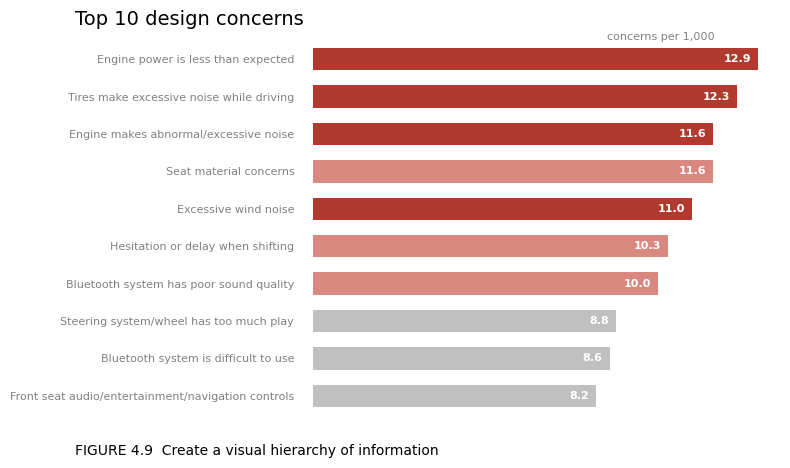

In [8]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Data  ordered from top to bottom
concerns = [
    'Engine power is less than expected',
    'Tires make excessive noise while driving',
    'Engine makes abnormal/excessive noise',
    'Seat material concerns',
    'Excessive wind noise',
    'Hesitation or delay when shifting',
    'Bluetooth system has poor sound quality',
    'Steering system/wheel has too much play',
    'Bluetooth system is difficult to use',
    'Front seat audio/entertainment/navigation controls'
]
values = [12.9, 12.3, 11.6, 11.6, 11.0, 10.3, 10.0, 8.8, 8.6, 8.2]

# Colors assigned to match the visual grouping in the image
colors = [
    '#b03a2e', '#b03a2e', '#b03a2e', '#d98880', '#b03a2e', '#d98880',
    '#d98880', '#c0c0c0', '#c0c0c0', '#c0c0c0'
]

# Reverse the lists 
for _ in [concerns, values, colors]:
    _.reverse()

# --- Plotting ---

fig, ax = plt.subplots(figsize=(8, 5))

# horizontal bars
bars = ax.barh(concerns, values, color=colors, height=0.6)

# Add data labels inside the bars
for bar in bars:
    width = bar.get_width()
    ax.text(
        width - 0.2,  # Position text slightly inside the end of the bar
        bar.get_y() + bar.get_height() / 2,
        f'{width}',
        ha='right',
        va='center',
        color='white',
        fontweight='bold',
        fontsize=8
    )

# Remove all spines and ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.set_xticklabels([]) # Remove x-axis labels

# Adjust y-axis tick label properties
ax.tick_params(axis='y', labelsize=8, pad=10)


fig.text(0.1, 0.88, 'Top 10 design concerns',
         fontsize=14,  ha='left')

# Subtitle
fig.text(0.9, 0.85, 'concerns per 1,000',
         fontsize=8, color='gray', ha='right')

# Caption
fig.text(0.1, 0.02, 'FIGURE 4.9  Create a visual hierarchy of information',
         fontsize=10, ha='left')


# Adjust layout to prevent labels from being cut off
plt.tight_layout(rect=[0, 0.05, 1, 0.9]) # Adjust rect to make space for titles

plt.show()